In [12]:
# Reference: https://www.datacamp.com/tutorial/decision-tree-classification-python

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [13]:
data = pd.read_csv("./data.csv")
data.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,M,Family,Small,C0
1,2,M,Family,Medium,C0
2,3,M,Family,Extra Large,C0
3,4,M,Sports,Extra Large,C0
4,5,M,Family,Large,C0


In [14]:
feature_cols = ['Gender', 'Car Type', 'Shirt Size']
features = data.columns[1:4] # Features
label = data.columns[-1] # Target variable

X = data[features]
Y = data[label]

In [ ]:
X['Gender'] = X['Gender'].replace('M', 1)
X['Gender'] = X['Gender'].replace('F', 0)
X['Car Type'] = X['Car Type'].replace('Family', 0)
X['Car Type'] = X['Car Type'].replace('Sports', 1)
X['Car Type'] = X['Car Type'].replace('Luxury', 2)
X['Shirt Size'] = X['Shirt Size'].replace('Small', 0)
X['Shirt Size'] = X['Shirt Size'].replace('Medium', 1)
X['Shirt Size'] = X['Shirt Size'].replace('Large', 2)
X['Shirt Size'] = X['Shirt Size'].replace('Extra Large', 3)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 1, shuffle = False, stratify = None)

In [16]:
X

,Gender,Car Type,Shirt Size
0,1,0,0
1,1,0,1
2,1,0,3
3,1,1,3
4,1,0,2
5,1,0,3
6,1,2,3
7,0,0,0
8,0,0,1
9,0,2,2


In [17]:
clf = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = None)

# Train Decision Tree Classifer
clf = clf.fit(X,Y)

In [18]:
# Predict the response for test dataset
# y_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [19]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


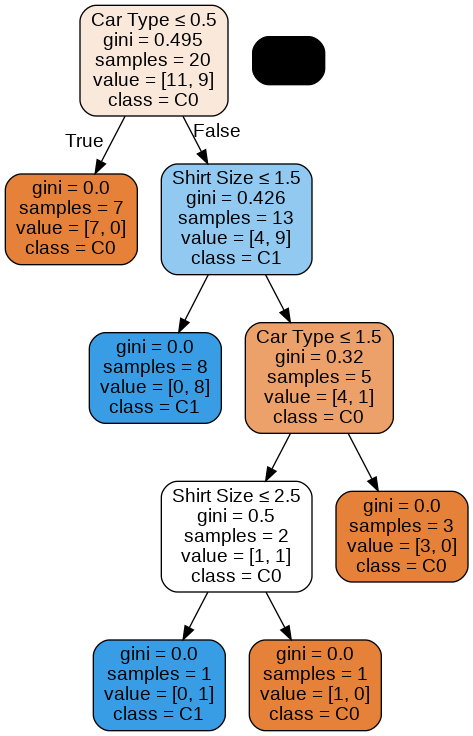

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['C0','C1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())